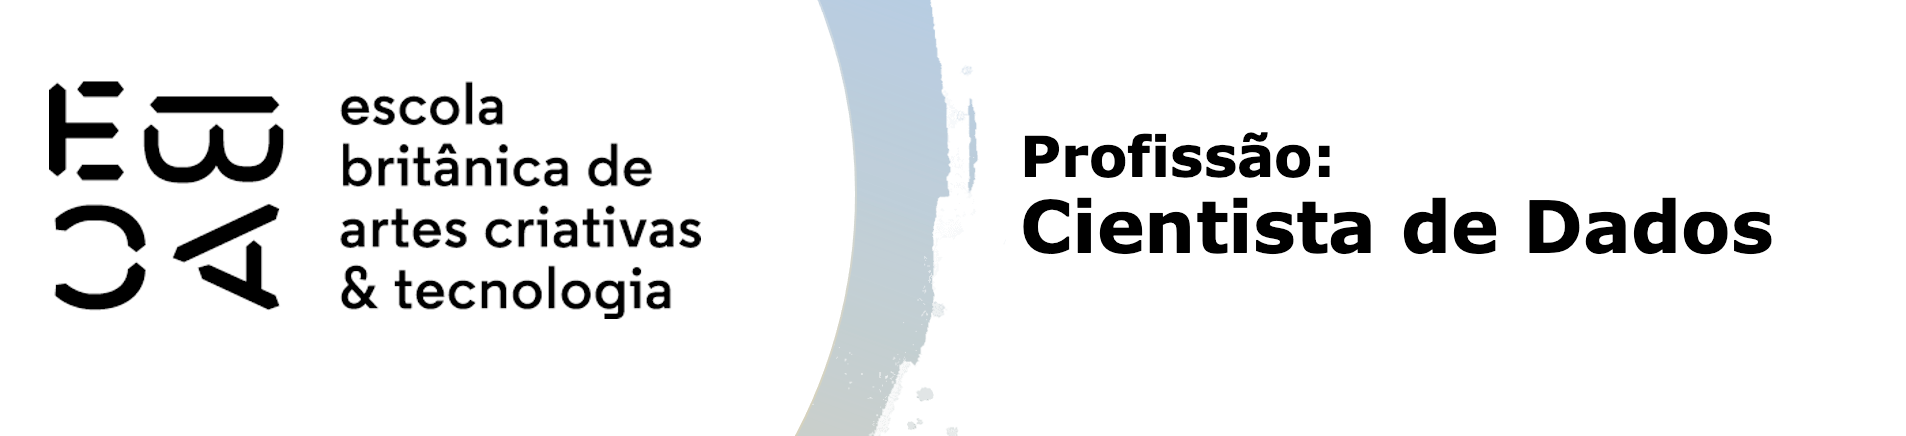

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns

from tqdm.notebook         import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score

In [2]:
df = pd.read_csv('input/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Veriicar se há dados ausentes
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Obtendo as colunas as seis primeiras colunas do DataFrame
colunas = df.iloc[:, 0:6].columns
df[colunas].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


In [8]:
# Cria uma cópia do DataFrame df.
df_pad = df.copy()

# Seleciona somente as colunas numéricas do DataFrame df_pad.
colunas_numericas = df_pad.select_dtypes(include = 'number').columns

#### Padronizando os dados para ter média zero e desvio padrão igual a um. 
#### Esta padronização é uma etapa comum no pré-processamento de dados , pois muitos algoritmos funcionam melhor quando as variáveis têm a mesma escala.

In [9]:
df_pad[colunas_numericas] = pd.DataFrame(data=StandardScaler().fit_transform(df_pad[colunas_numericas]), 
                                         columns=df_pad[colunas_numericas].columns)

df_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,-1.233426,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,-0.136078,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,2.058618,-0.790293,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,0.961270,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,0.961270,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,Dec,2.058618,2.121412,-0.894178,-0.762629,Returning_Visitor,True,False
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,0.976499,Returning_Visitor,True,False
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,2.218733,Returning_Visitor,True,False
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,Nov,-0.136078,-0.207952,-0.061364,1.721839,Returning_Visitor,False,False


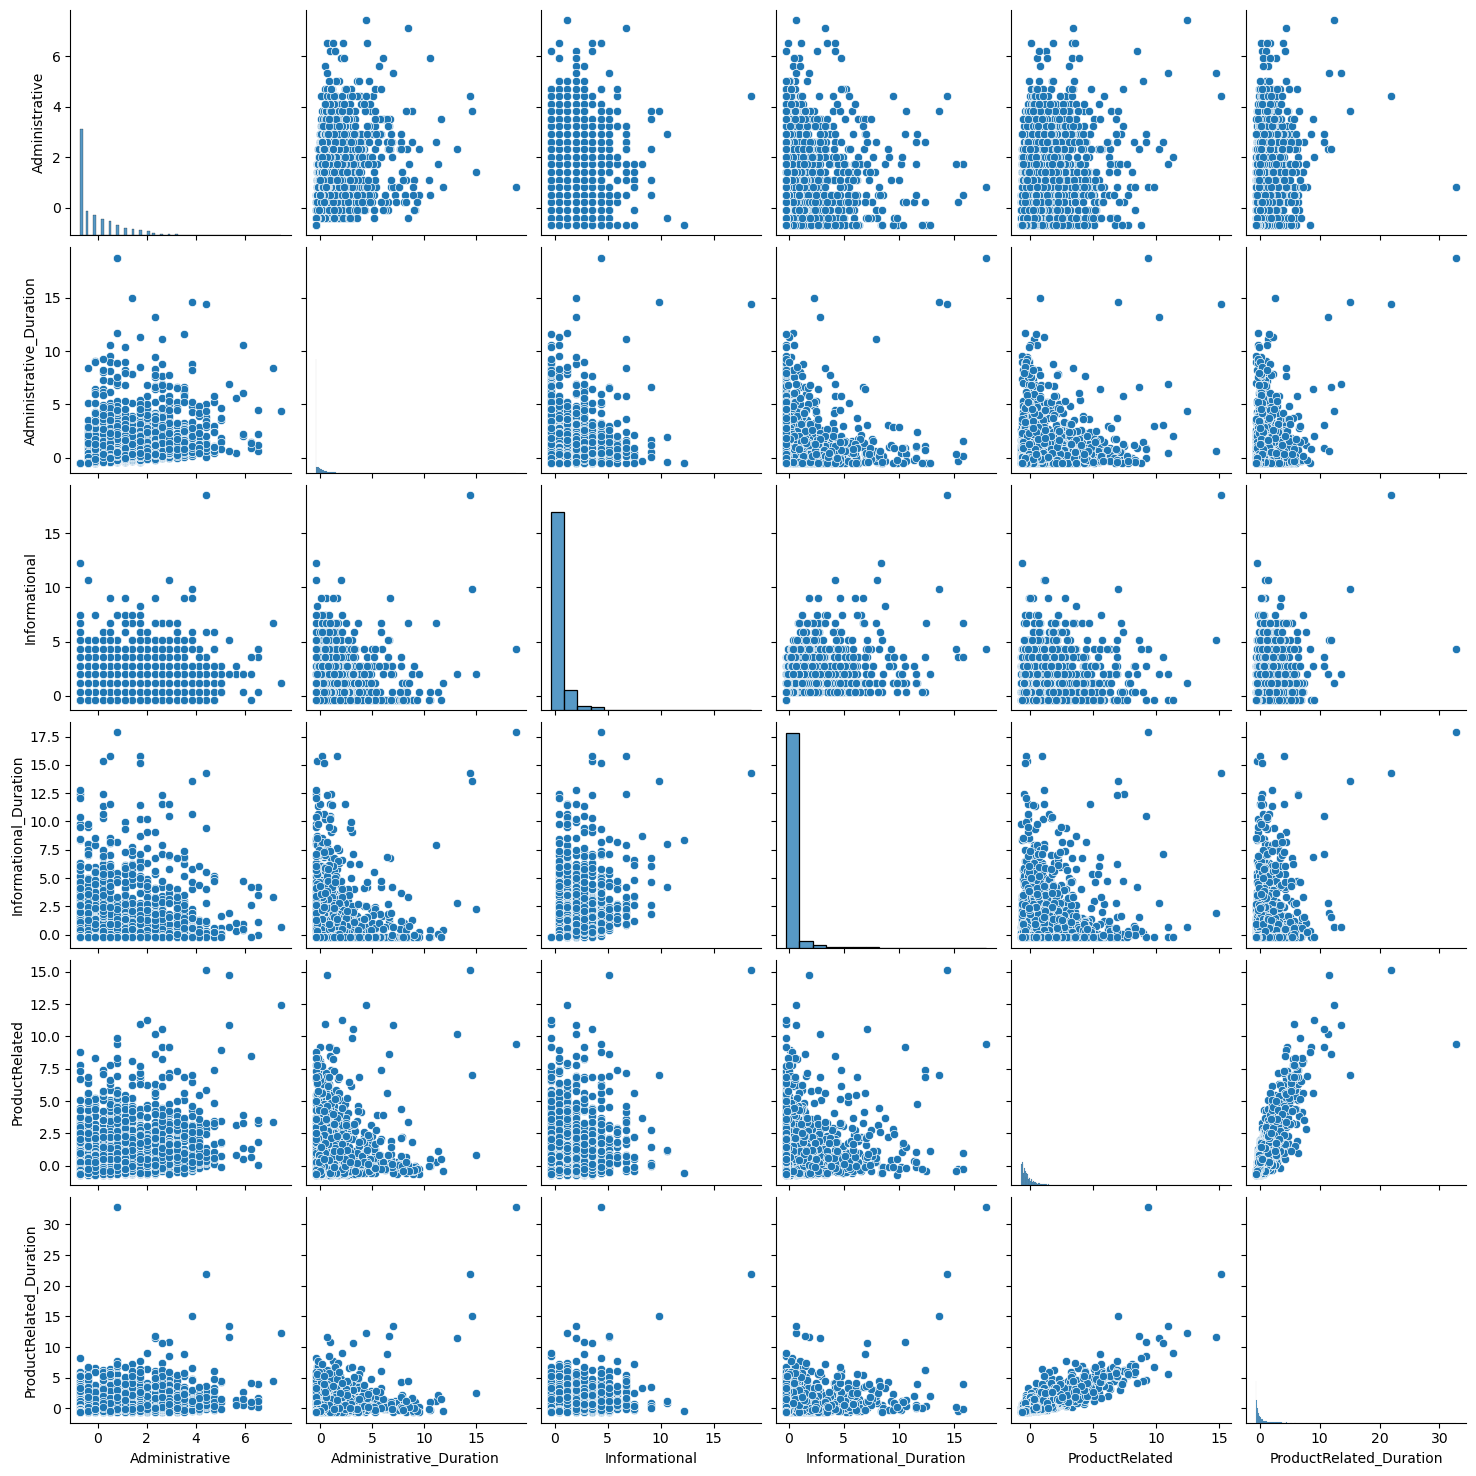

In [10]:
# Gráfico para visualizar a relação entre as variáveis no DataFrame df_pad com a padronização.
sns.pairplot(data = df_pad[colunas])
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [11]:
# TÉCNICA DO COTOVELO

SQD = []
K = range(1,11)
for k in tqdm(K):
    km = KMeans(n_clusters=k,
               n_init = 'auto')
    km = km.fit(df[colunas])
    SQD.append(km.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]

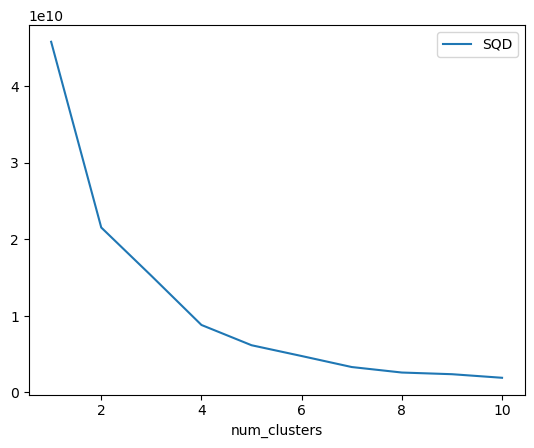

In [12]:
df_sqd = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df_sqd.plot(x = 'num_clusters', y = 'SQD');

  0%|          | 0/9 [00:00<?, ?it/s]

   n_clusters  silueta_média
0           2       0.622424
1           3       0.508982
2           4       0.507919
3           5       0.506351
4           6       0.457546
5           7       0.461746
6           8       0.444615
7           9       0.442031
8          10       0.422698


<Axes: xlabel='n_clusters'>

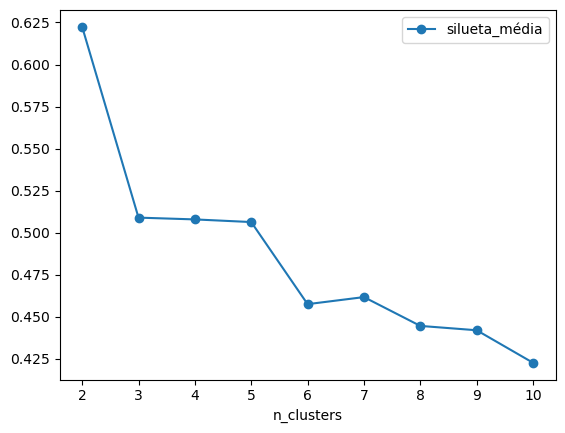

In [16]:
# TÉCNICA DA SILUETA

# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []

# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    
    # Aqui rodamos o k-means
    km = KMeans(n_clusters = n_clusters, 
                n_init = 'auto').fit(df_pad[colunas])
    
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(X = df_pad[colunas], 
                                      labels = km.labels_))
    
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    df_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(codes = km.labels_, 
                                                                  categories = nomes_grupos)
    
# Vamos plotar agora os dados de silueta média.
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

print(df_silueta)

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

<bound method Axes.legend of <Axes: xlabel='grupos_2'>>

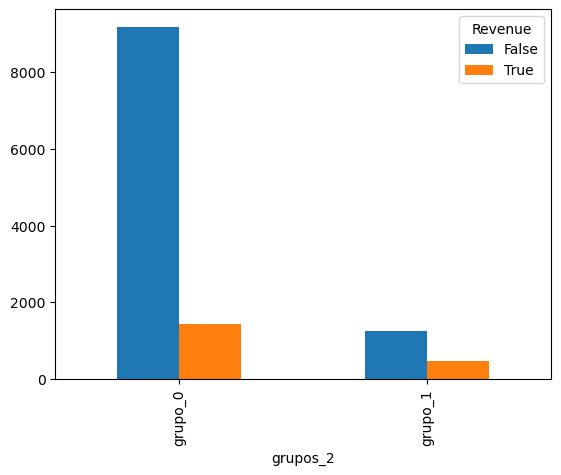

In [14]:
ax = df_pad.groupby(['grupos_2', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend

<bound method Axes.legend of <Axes: xlabel='grupos_3'>>

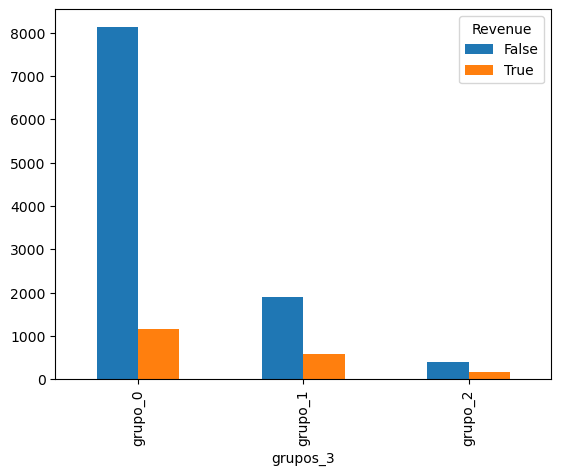

In [15]:
ax = df_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend

In [19]:
# Cria uma cópia do DataFrame padronizado df_pad.
df_pad_ = df_pad.copy()

# Renomeia as duas categorias na coluna 'grupos_2' para rótulos mais descritivos.
df_pad_['grupos_2'] = df_pad_['grupos_2'].cat.rename_categories({'grupo_0': 'Não interessados', 
                                                                 'grupo_1': 'Compradores'})

# Renomeia as três categorias na coluna 'grupos_3' para rótulos mais descritivos.
df_pad_['grupos_3'] = df_pad_['grupos_3'].cat.rename_categories({'grupo_0': 'Não interessados', 
                                                                 'grupo_1': 'Potenciais compradores', 
                                                                 'grupo_2': 'Compradores'})


<bound method Axes.legend of <Axes: xlabel='grupos_2'>>

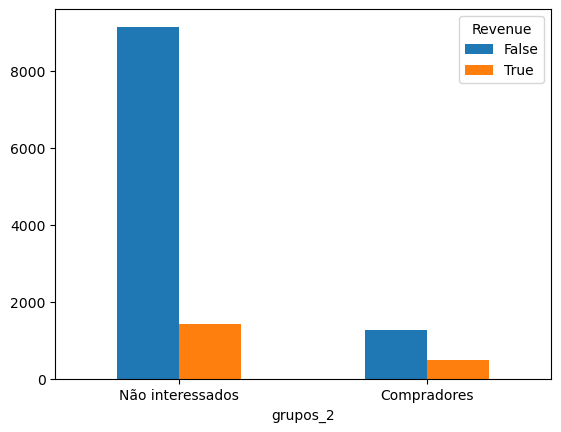

In [21]:
ax = df_pad_.groupby(['grupos_2', 'Revenue'])['Revenue'].count().unstack().plot.bar(rot=0)

ax.legend

<bound method Axes.legend of <Axes: xlabel='grupos_3'>>

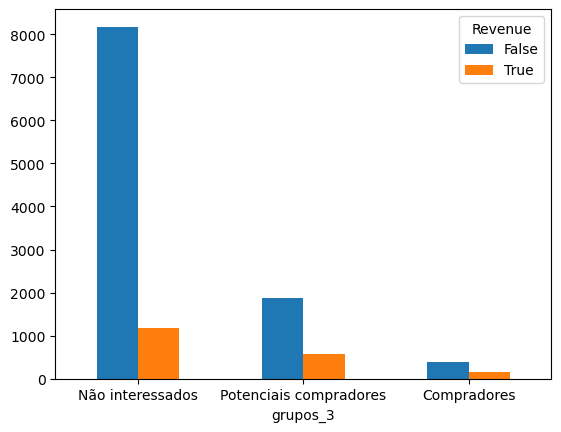

In [22]:
ax = df_pad_.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar(rot=0)

ax.legend

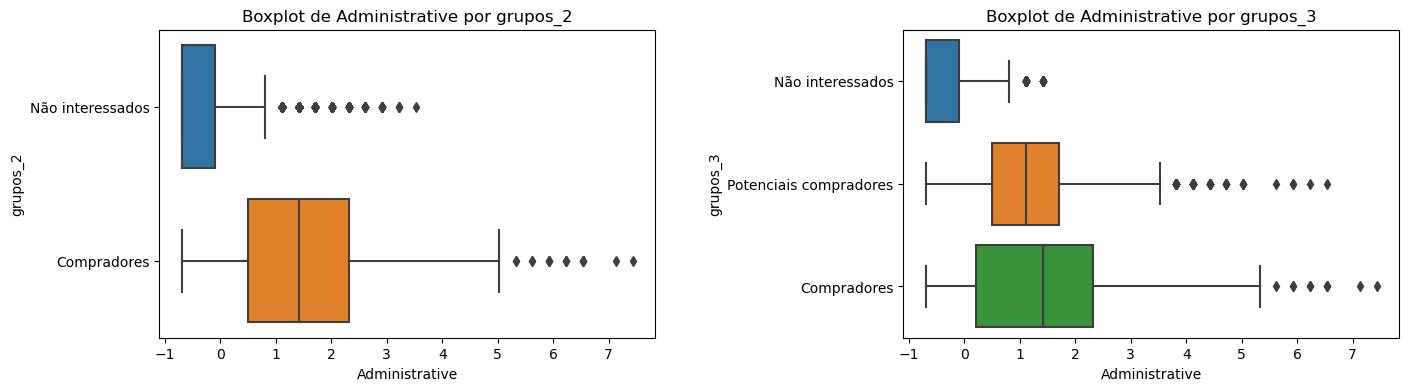

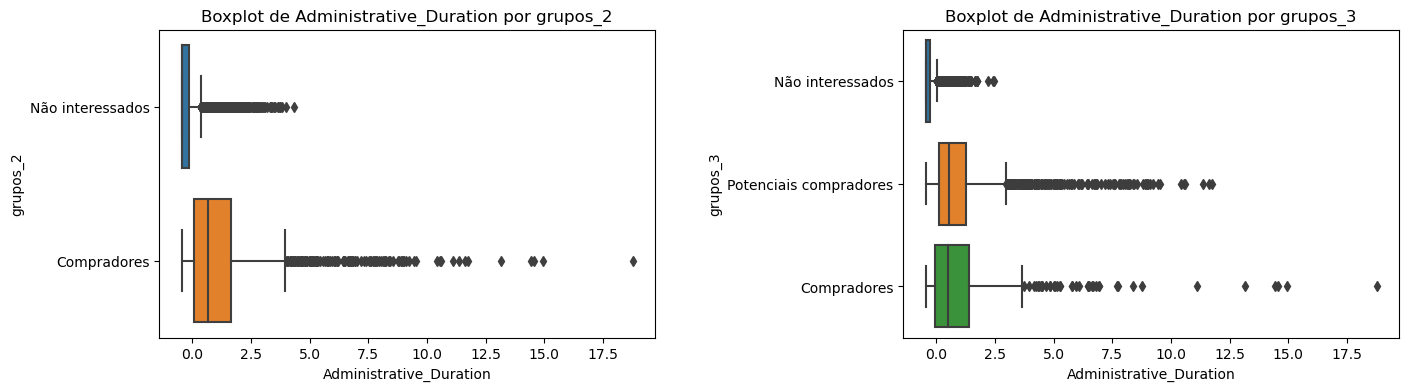

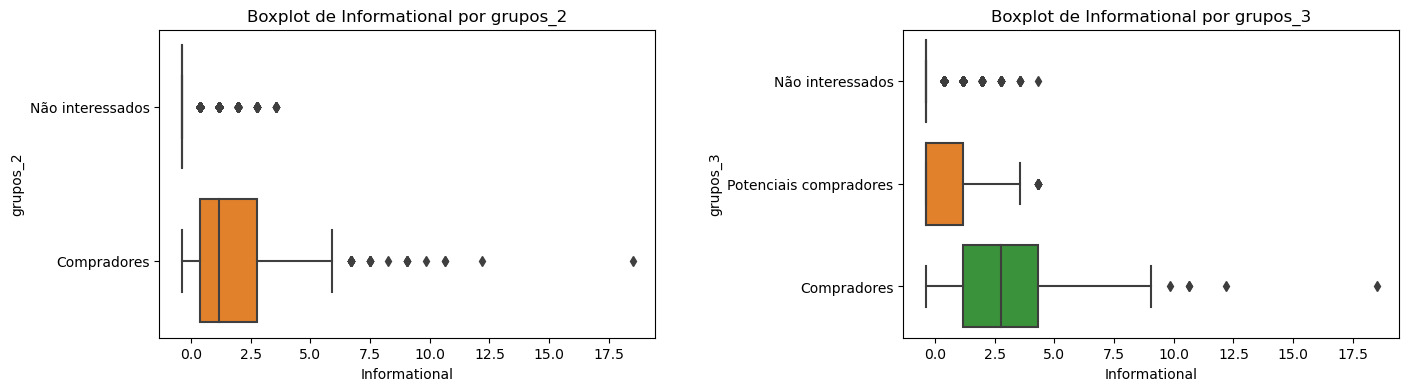

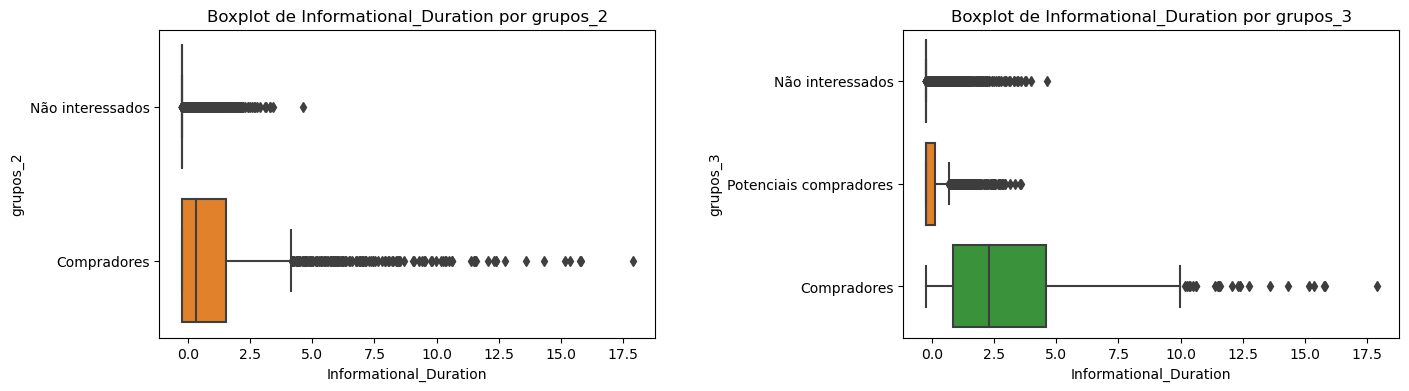

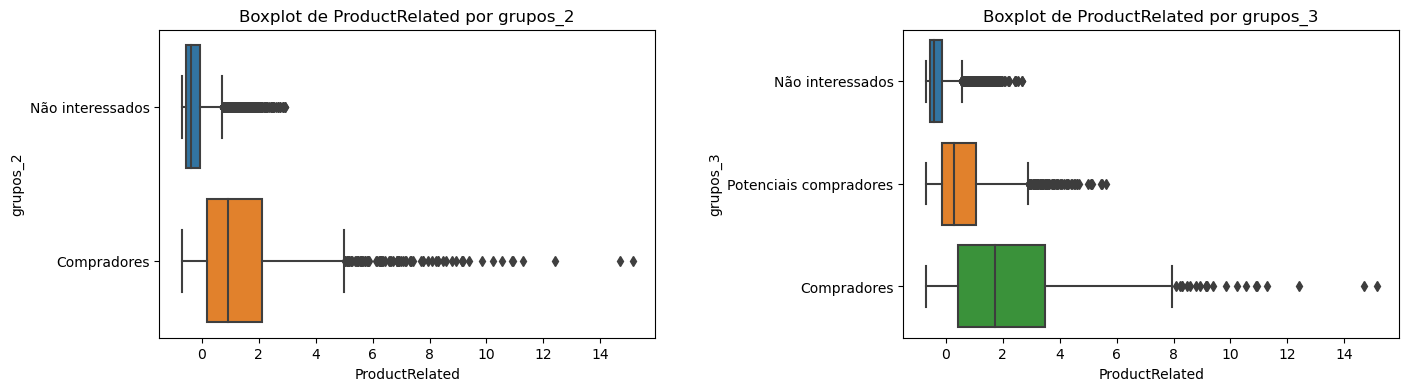

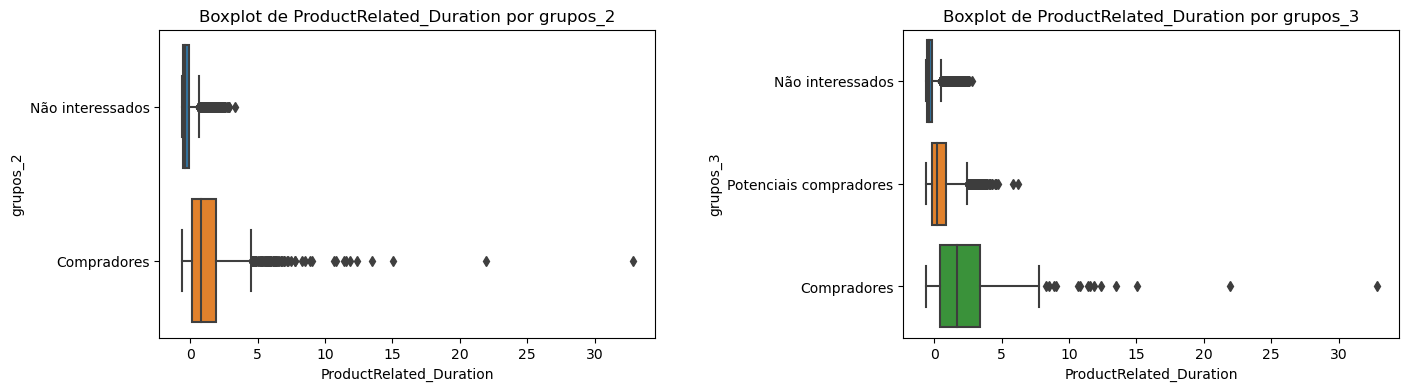

In [64]:
for n in range(6):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
    # Cria um boxplot para o conjunto de clusters 'grupos_2'.
    sns.boxplot(data=df_pad_, x=colunas[n], y='grupos_2', ax=ax[0])
    ax[0].set_title(f'Boxplot de {colunas[n]} por grupos_2')
    
    # Cria um boxplot para o conjunto de clusters 'grupos_3'.
    sns.boxplot(data=df_pad_, x=colunas[n], y='grupos_3', ax=ax[1])
    ax[1].set_title(f'Boxplot de {colunas[n]} por grupos_3')
    
    plt.subplots_adjust(wspace=0.5)
    plt.show()

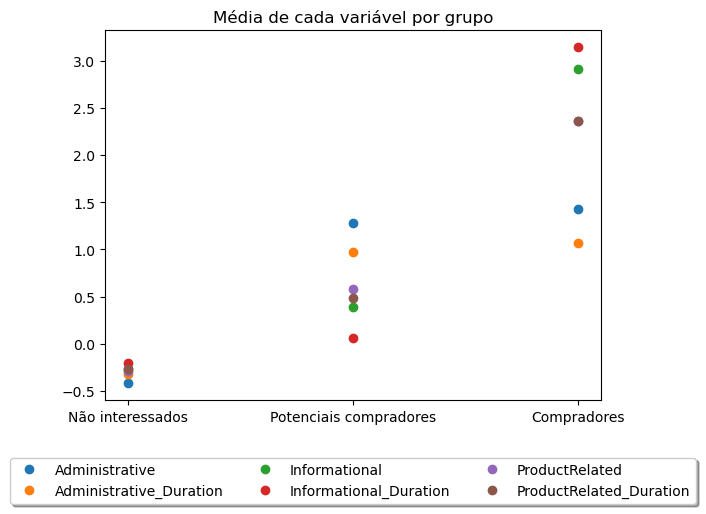

In [60]:
fig, ax = plt.subplots()

# Plota um gráfico de dispersão para as médias das variáveis numéricas em diferentes clusters.
ax.plot(df_pad_.groupby(['grupos_3'])[colunas].mean(), 'o')

# Adiciona uma legenda ao gráfico com os nomes das variáveis.
ax.legend(colunas, loc='lower center', bbox_to_anchor=(0.5, -.3), ncol=3, fancybox=True, shadow=True)

ax.set_title('Média de cada variável por grupo')

# Exibe o gráfico.
plt.show()

Representação da média de cada variável por grupo de compradores, potenciais compradores e não interessados

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [54]:
pd.crosstab(df_pad_['Revenue'], df_pad_['grupos_2'], margins=True)

grupos_2,Não interessados,Compradores,All
Revenue,,,
False,9149,1273,10422
True,1429,479,1908
All,10578,1752,12330


In [52]:
pd.crosstab(df_pad_['Revenue'], df_pad_['grupos_2'], normalize='all', margins=True).round(decimals = 2)

grupos_2,Não interessados,Compradores,All
Revenue,,,
False,0.74,0.10,0.85
True,0.12,0.04,0.15
All,0.86,0.14,1.00


#### Pela divisão de 2 grupos (compradores e não compradores), no grupo de 'não interessados', pelo revenue, teve um acerto de 74% dos 'não compradores' totais, que equivalem a 85% dos clientes que não compraram, sendo que 'false' indica que o cliente não efetuou compra. No grupo de 'compradores', teve um acerto apenas de 4% dos que efetuaram compra, que equivalem a 15% dos clientes.

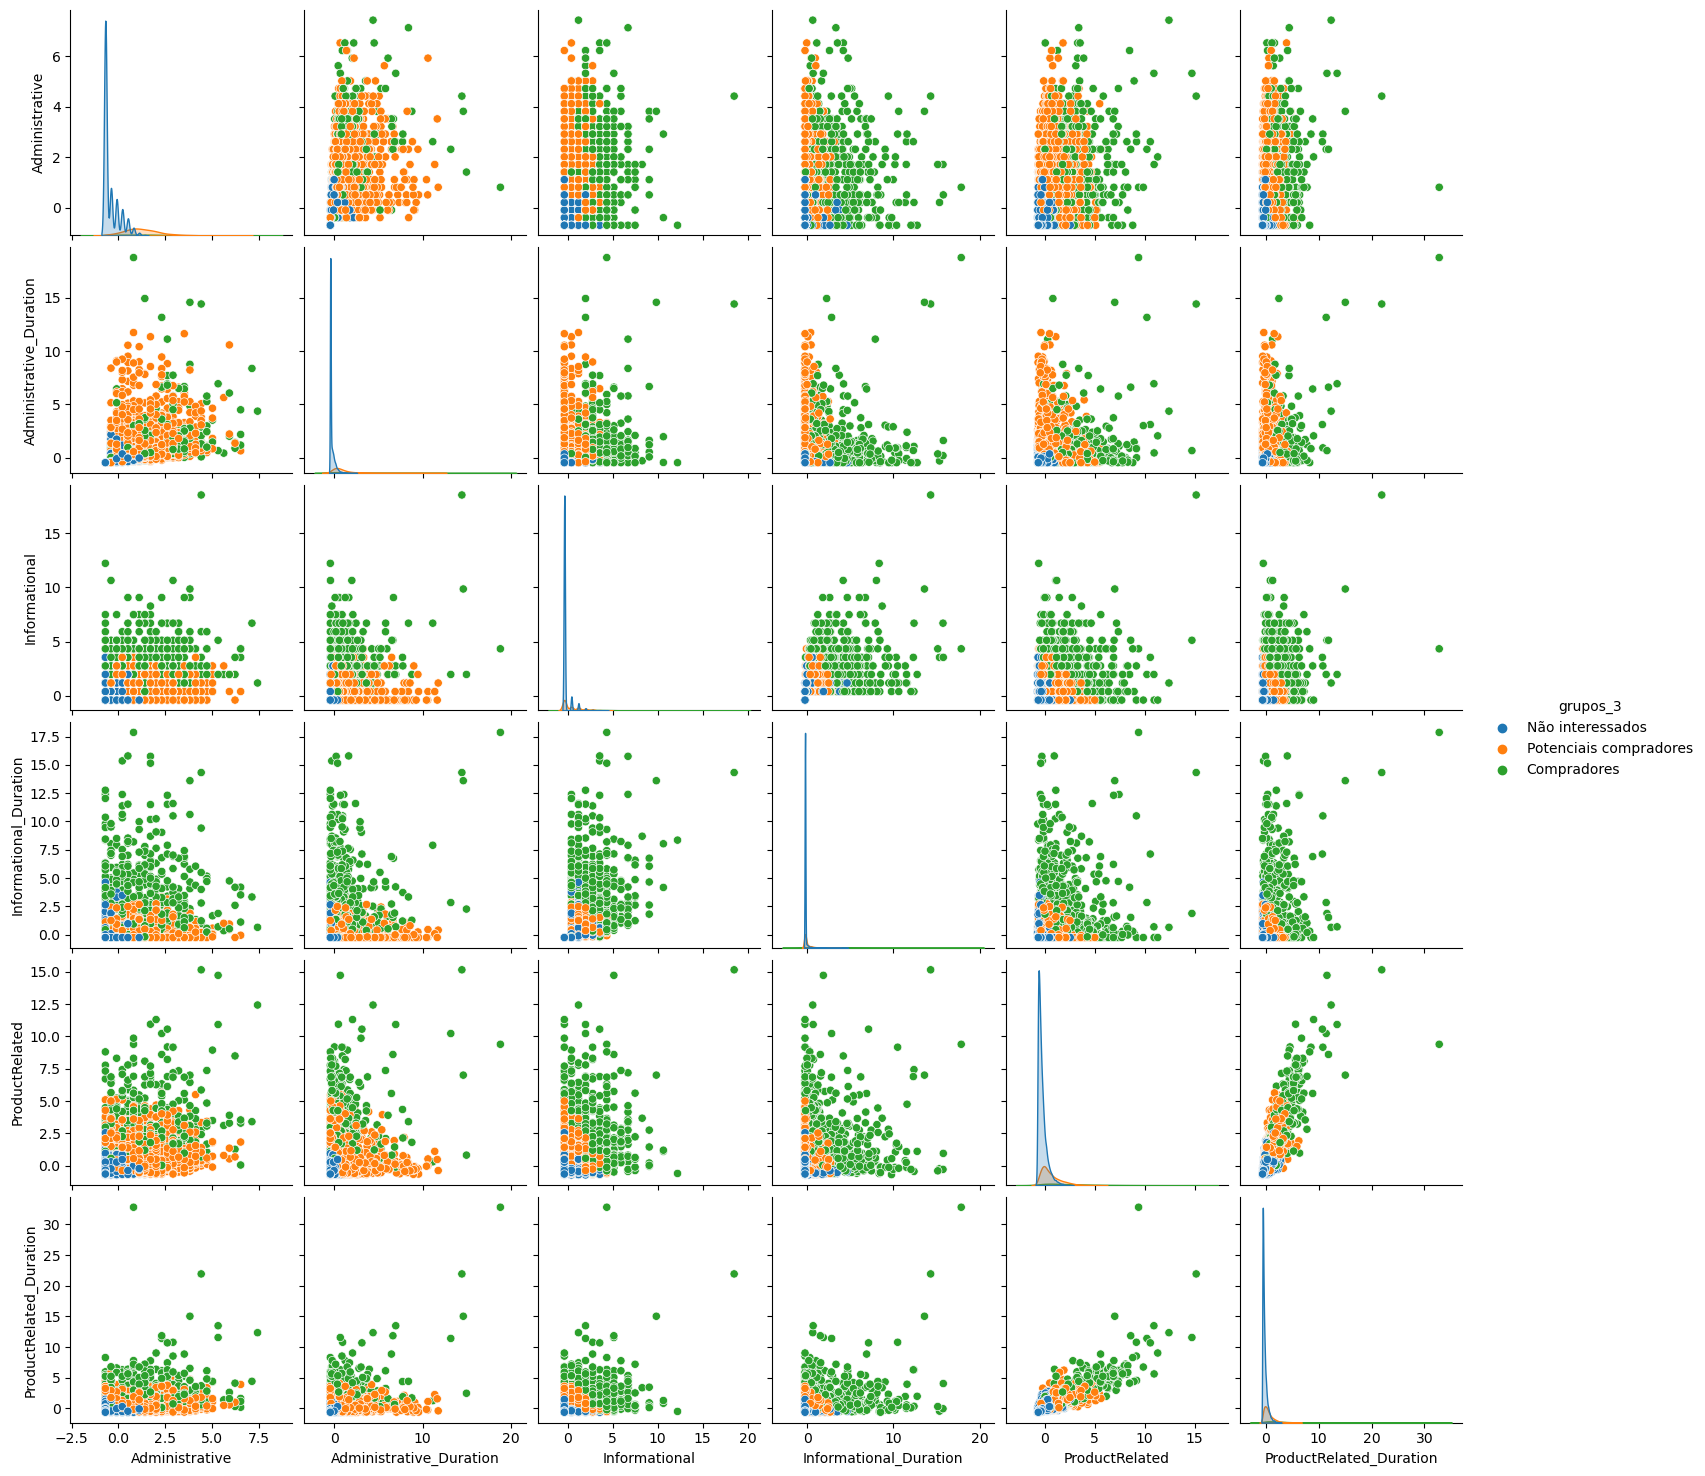

In [66]:
n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(df_pad_[list(colunas) + [var_grupo]], hue=var_grupo)